In [1]:
from google.colab import drive
drive.mount('/content/drive')

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, classification_report
from tensorflow import keras
from sklearn.metrics import confusion_matrix
!pip install efficientnet
import efficientnet.keras as efn

import numpy as np
name = "Macenko"

Mounted at /content/drive
     |████████████████████████████████| 50 kB 2.6 MB/s 


In [2]:
ModelGenerators= []
Generator = ImageDataGenerator(rescale = 1.0/255)
ModelGenerator = Generator.flow_from_directory("/content/drive/MyDrive/218007620_HonorsProject/"+name+" - Test",
                                      target_size=(260, 260),color_mode = 'rgb',batch_size = 1,seed=15, shuffle=False)
ModelGenerators.append(ModelGenerator)
Generator2 = ImageDataGenerator(rescale = 1.0/255)
ModelGenerator2 = Generator2.flow_from_directory("/content/drive/MyDrive/218007620_HonorsProject/"+name+" - Test",
                                      target_size=(300, 300),color_mode = 'rgb',batch_size = 1,seed=15, shuffle=False)
ModelGenerators.append(ModelGenerator2)
Generator3 = ImageDataGenerator(rescale = 1.0/255)
ModelGenerator3 = Generator3.flow_from_directory("/content/drive/MyDrive/218007620_HonorsProject/"+name+" - Test",
                                      target_size=(528, 528),color_mode = 'rgb',batch_size = 1,seed=15, shuffle=False)
ModelGenerators.append(ModelGenerator3)
Generator4 = ImageDataGenerator(rescale = 1.0/255)
ModelGenerator4 = Generator4.flow_from_directory("/content/drive/MyDrive/218007620_HonorsProject/"+name+" - Test",
                                      target_size=(224, 224),color_mode = 'rgb',batch_size = 1,seed=15, shuffle=False)
ModelGenerators.append(ModelGenerator4)

Found 60 images belonging to 4 classes.
Found 60 images belonging to 4 classes.
Found 60 images belonging to 4 classes.
Found 60 images belonging to 4 classes.


In [3]:
estimator =[]
model1 = keras.models.load_model('/content/drive/MyDrive/218007620_HonorsProject/Model/best_'+name+'B2.h5')
estimator.append( model1)
model2 = keras.models.load_model('/content/drive/MyDrive/218007620_HonorsProject/Model/best_'+name+'B3.h5')
estimator.append( model2)
model3 = keras.models.load_model('/content/drive/MyDrive/218007620_HonorsProject/Model/best_'+name+'B6.h5')
estimator.append( model3)
model4 = keras.models.load_model('/content/drive/MyDrive/218007620_HonorsProject/Model/best_'+name+'B0.h5')
estimator.append(model4)

predictions =[]
for i in range(len(estimator)):
  prediction = estimator[i].predict(ModelGenerators[i], verbose = 1)
  prediction = np.argmax(prediction, axis = 1)
  predictions.append(prediction)




60/60 [==============================] - 11s 153ms/step


[[12  1  1  1]
 [ 0 14  0  1]
 [ 0  1 14  0]
 [ 0  0  0 15]]


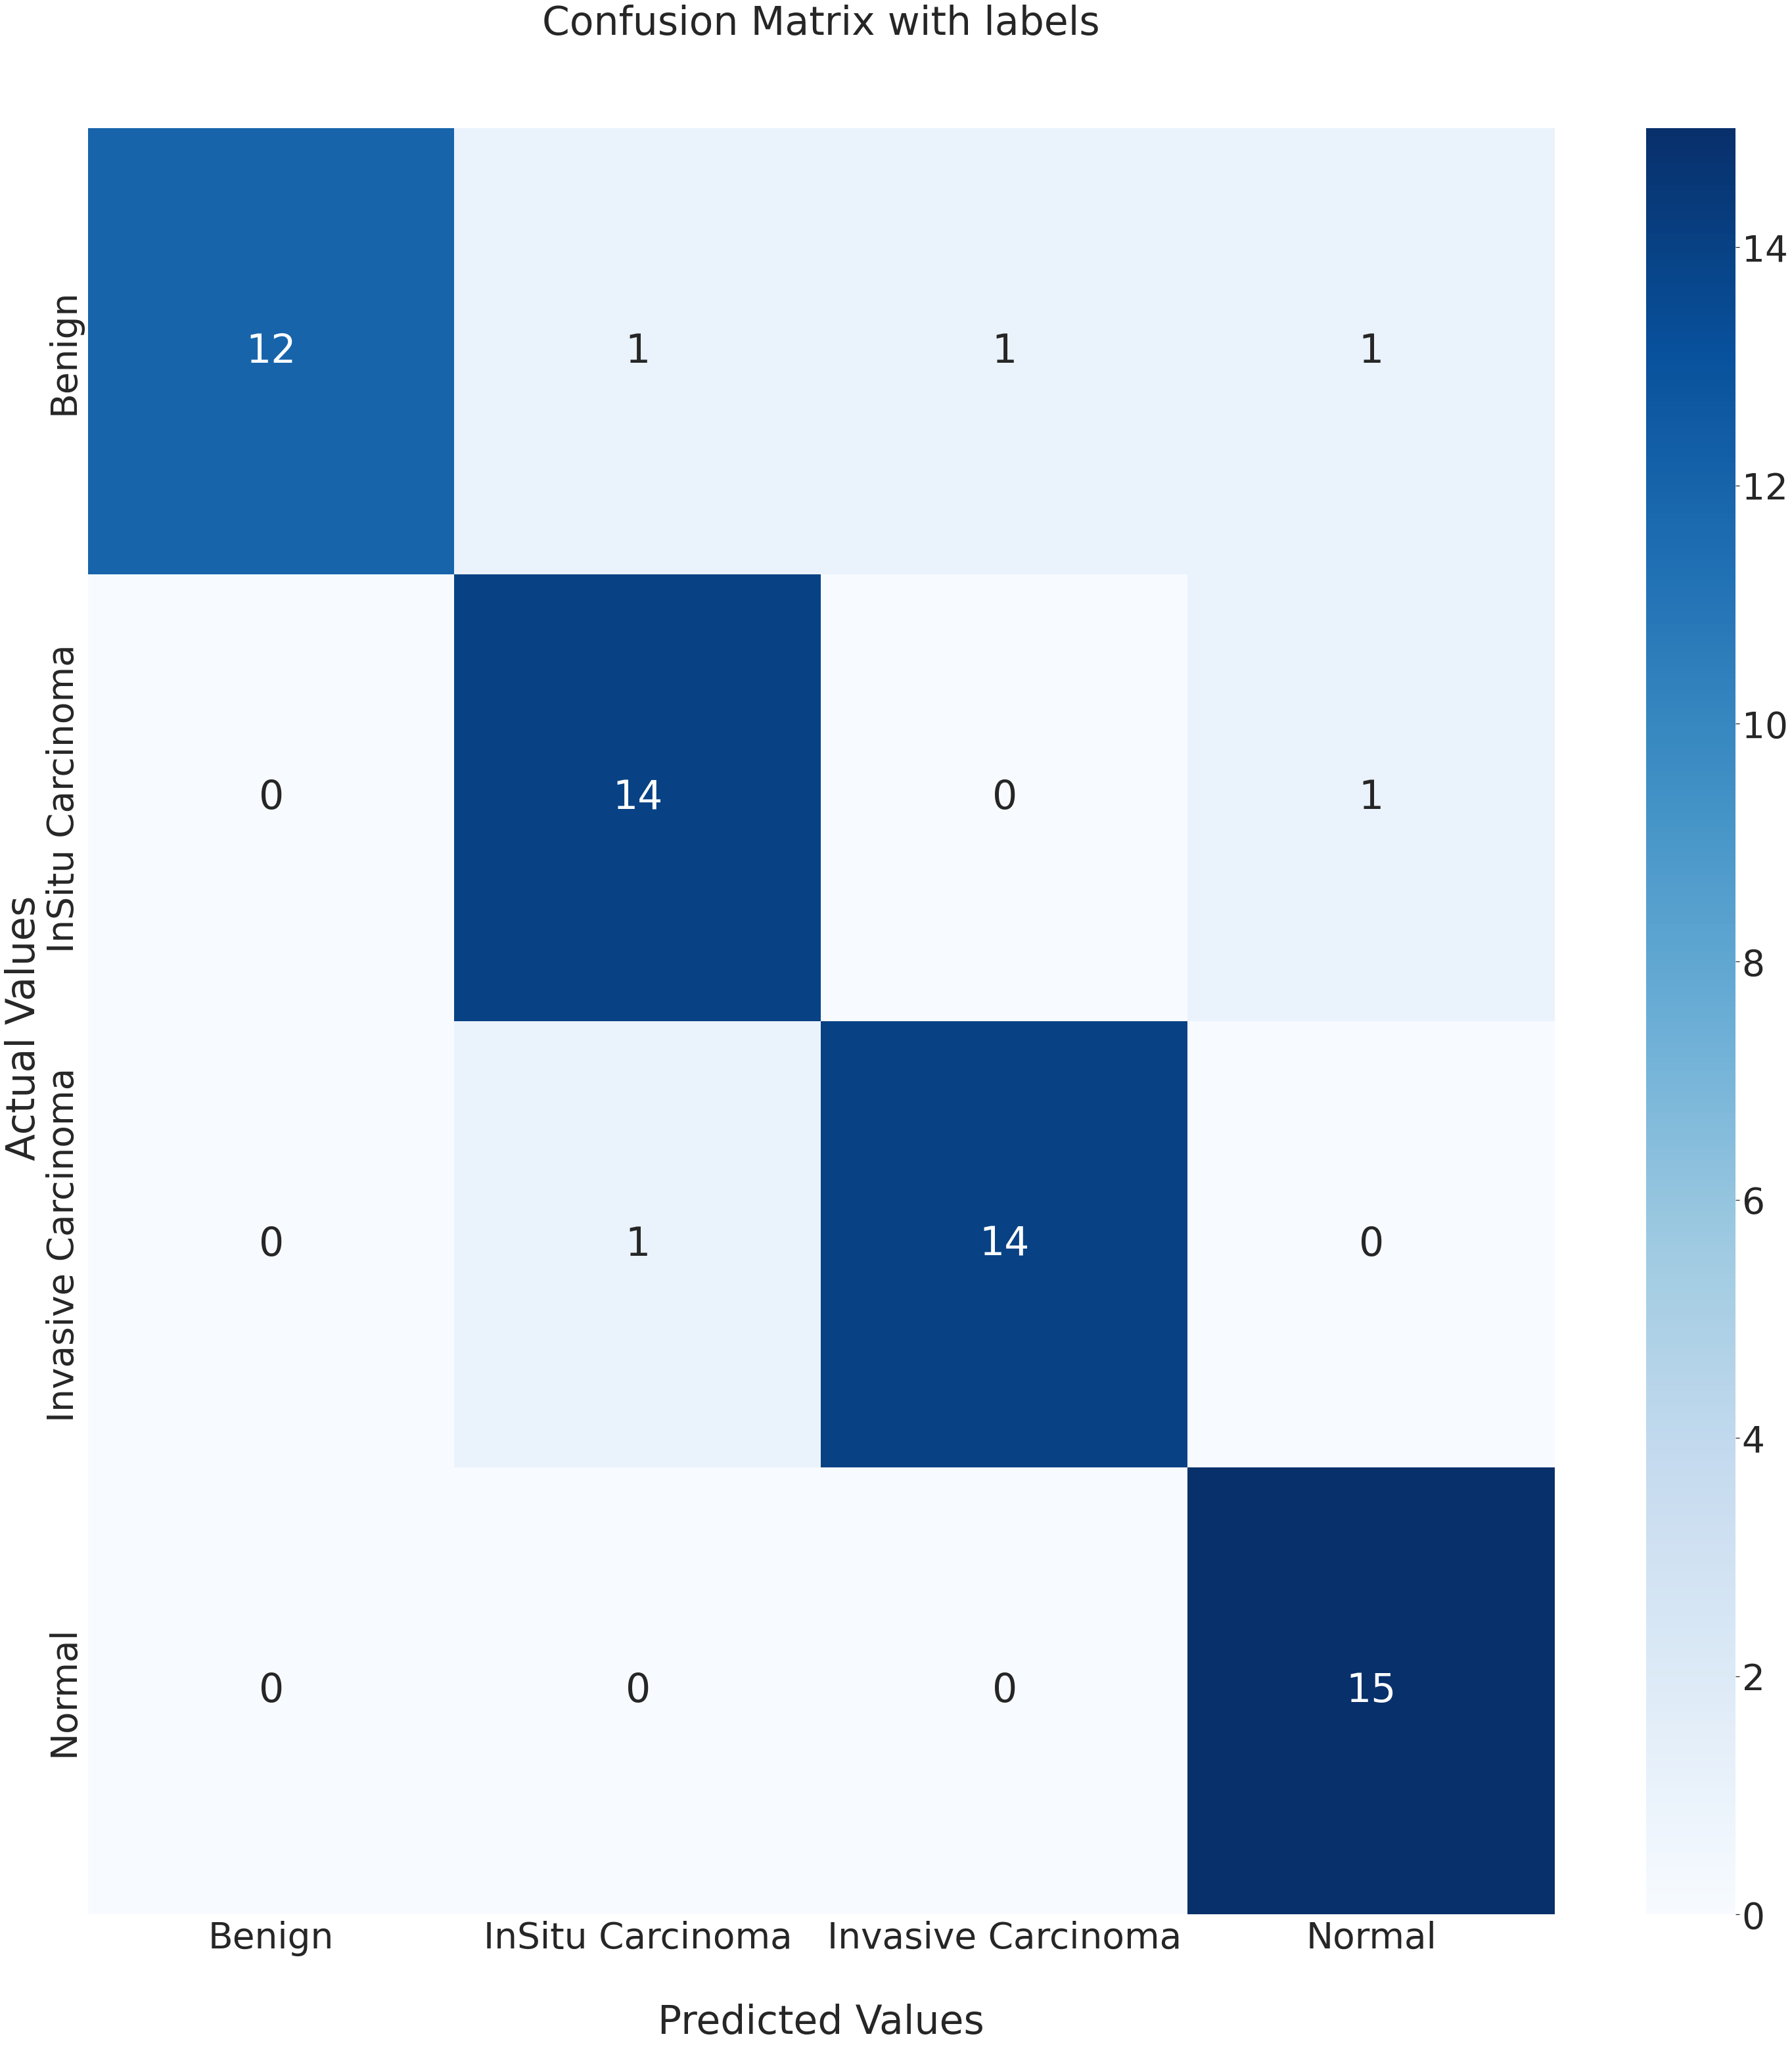

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        15
           1       0.88      0.93      0.90        15
           2       0.93      0.93      0.93        15
           3       0.88      1.00      0.94        15

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60



In [25]:
#Most common Prediction
from collections import Counter
y_pred = [Counter(col).most_common(1)[0][0] for col in zip(*predictions)]
'''y_pred = model1.predict(ModelGenerator)
y_pred = np.argmax(y_pred, axis =1)
print(y_pred)'''

confusionMatrix = confusion_matrix(ModelGenerator.classes, y_pred)


print(confusionMatrix)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(50,50))

ax = sns.heatmap(confusionMatrix, annot=True, cmap='Blues')
sns.set(font_scale = 5)
ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Benign','InSitu Carcinoma', 'Invasive Carcinoma', 'Normal'])
ax.yaxis.set_ticklabels(['Benign','InSitu Carcinoma', 'Invasive Carcinoma', 'Normal'])

## Display the visualization of the Confusion Matrix.

plt.show()

print(classification_report(ModelGenerator.classes, y_pred))

[[10  4  0  1]
 [ 0 13  2  0]
 [ 0  1 14  0]
 [ 0  0  4 11]]


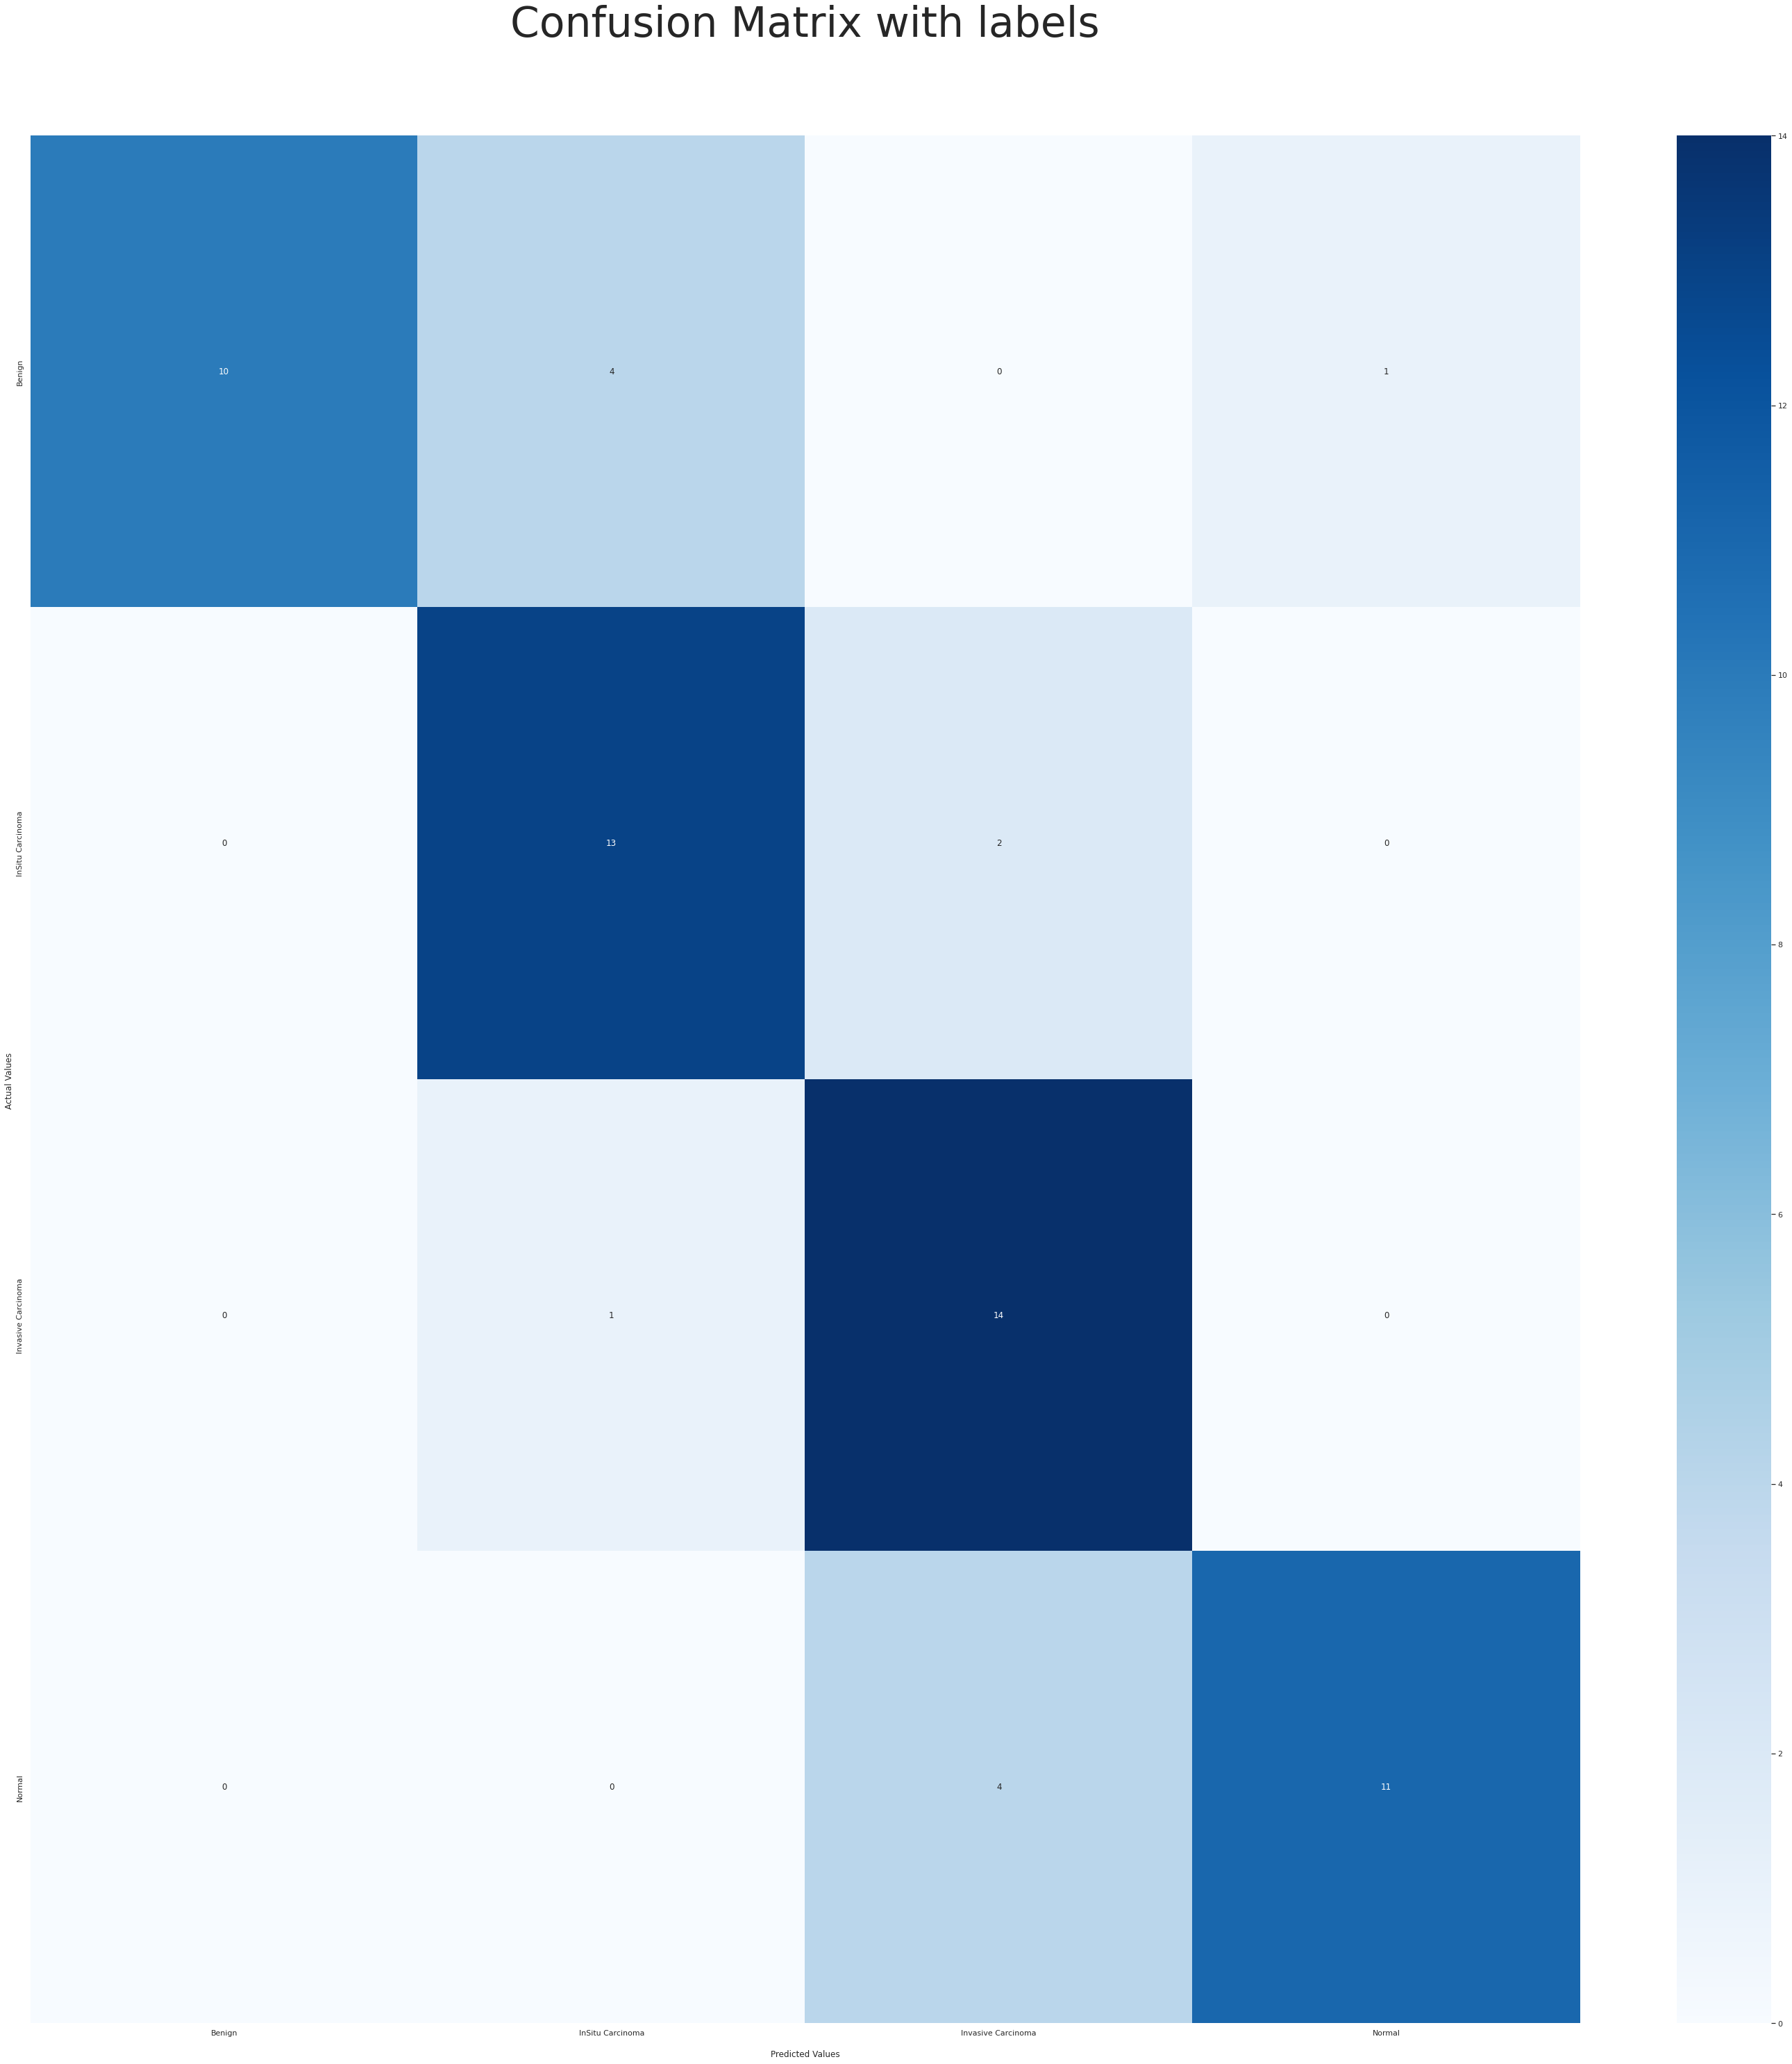

              precision    recall  f1-score   support

           0       1.00      0.67      0.80        15
           1       0.72      0.87      0.79        15
           2       0.70      0.93      0.80        15
           3       0.92      0.73      0.81        15

    accuracy                           0.80        60
   macro avg       0.83      0.80      0.80        60
weighted avg       0.83      0.80      0.80        60



In [24]:
#Average Prediction

y_pred = np.mean(predictions, axis = 0)
y_pred = np.round(y_pred)
'''y_pred = model1.predict(ModelGenerator)
y_pred = np.argmax(y_pred, axis =1)
print(y_pred)'''

confusionMatrix = confusion_matrix(ModelGenerator.classes, y_pred)


print(confusionMatrix)


plt.figure(figsize=(50,50))
ax = sns.heatmap(confusionMatrix, annot=True, cmap='Blues')
sns.set(font_scale = 5)
ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Benign','InSitu Carcinoma', 'Invasive Carcinoma', 'Normal'])
ax.yaxis.set_ticklabels(['Benign','InSitu Carcinoma', 'Invasive Carcinoma', 'Normal'])

## Display the visualization of the Confusion Matrix.
plt.show()

print(classification_report(ModelGenerator.classes, y_pred))

In [3]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 18429080873852269833
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11320098816
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 2131213920324200468
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
 xla_global_id: 416903419]